# Importing packages

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

# Loading the files

In [2]:
df = pd.read_csv('sj.csv')
df.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [3]:
df.year.value_counts()

1999    52
1991    52
2005    52
2004    52
2003    52
2002    52
2001    52
2000    52
1998    52
2007    52
1997    52
1996    52
1995    52
1994    52
1993    52
1992    52
2006    52
1990    35
2008    17
Name: year, dtype: int64

In [4]:
years = np.arange(1991,2009)
bar = np.array([17, 69, 121, 173, 225, 277, 329, 381, 433, 485, 537, 589, 641, 693, 745, 797, 849, 901])

In [5]:
years2 = np.arange(1991,2009,2)
bar2 = np.array([17, 121, 225, 329, 433, 537, 641, 745, 849])

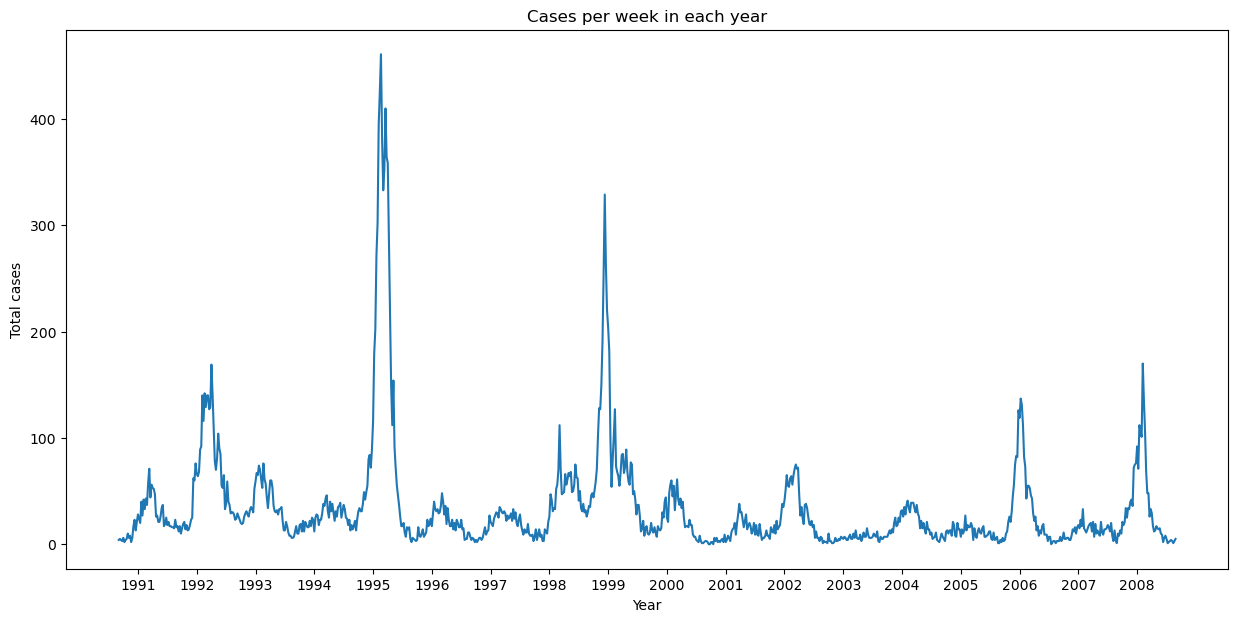

In [6]:
plt.figure(figsize=(15,7))
plt.plot(df.total_cases)
plt.xlabel('Year')
plt.ylabel('Total cases')
plt.title('Cases per week in each year')
plt.xticks(bar,years);

In [7]:
df[['reanalysis_dew_point_temp_k',
'reanalysis_air_temp_k',
'reanalysis_max_air_temp_k',
'reanalysis_min_air_temp_k',
'reanalysis_avg_temp_k']] = df[['reanalysis_dew_point_temp_k',
'reanalysis_air_temp_k',
'reanalysis_max_air_temp_k',
'reanalysis_min_air_temp_k',
'reanalysis_avg_temp_k']]-273.15

## Precipitation

In [8]:
df[['station_precip_mm','precipitation_amt_mm','reanalysis_sat_precip_amt_mm','reanalysis_precip_amt_kg_per_m2']].describe()

,station_precip_mm,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,reanalysis_precip_amt_kg_per_m2
count,930.000000,927.000000,927.000000,930.000000
mean,26.785484,35.470809,35.470809,30.465419
std,29.325811,44.606137,44.606137,35.628055
min,0.000000,0.000000,0.000000,0.000000
25%,6.825000,0.000000,0.000000,10.825000
50%,17.750000,20.800000,20.800000,21.300000
75%,35.450000,52.180000,52.180000,37.000000
max,305.900000,390.600000,390.600000,570.500000


In [9]:
df.drop(['precipitation_amt_mm','reanalysis_sat_precip_amt_mm','reanalysis_precip_amt_kg_per_m2'], axis=1, inplace=True)

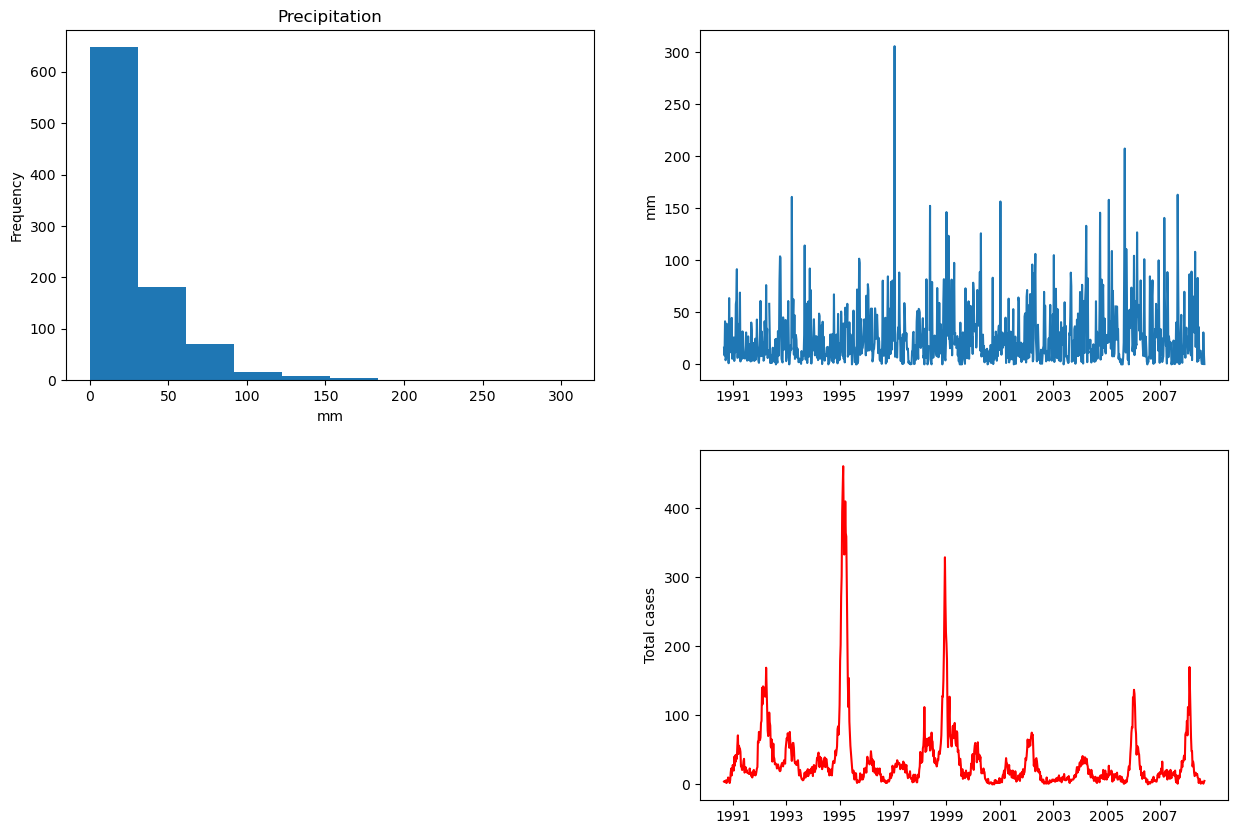

In [10]:
plt.figure(figsize=(15,10))

ax1 = plt.subplot(2, 2, 1)
ax1.hist(df.station_precip_mm)
ax1.set_title('Precipitation')
ax1.set_xlabel('mm')
ax1.set_ylabel('Frequency')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(df.station_precip_mm)
ax2.set_ylabel('mm')
ax2.set_xticks(bar2,years2);

ax3 = plt.subplot(2, 2, 4)
ax3.plot(df.total_cases, 'r')
ax3.set_ylabel('Total cases')
ax3.set_xticks(bar2,years2);

plt.show()

In [11]:
ax1.hist(df.station_precip_mm)


(array([648., 181.,  70.,  17.,   8.,   4.,   1.,   0.,   0.,   1.]),
 array([  0.  ,  30.59,  61.18,  91.77, 122.36, 152.95, 183.54, 214.13,
        244.72, 275.31, 305.9 ]),
 <BarContainer object of 10 artists>)

## Humidity

In [12]:
df[['reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg']].describe()

,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg
count,930.000000,930.000000
mean,78.568181,16.552409
std,3.389488,1.560923
min,66.735714,11.715714
25%,76.246071,15.236429
50%,78.667857,16.845714
75%,80.963214,17.858571
max,87.575714,19.440000


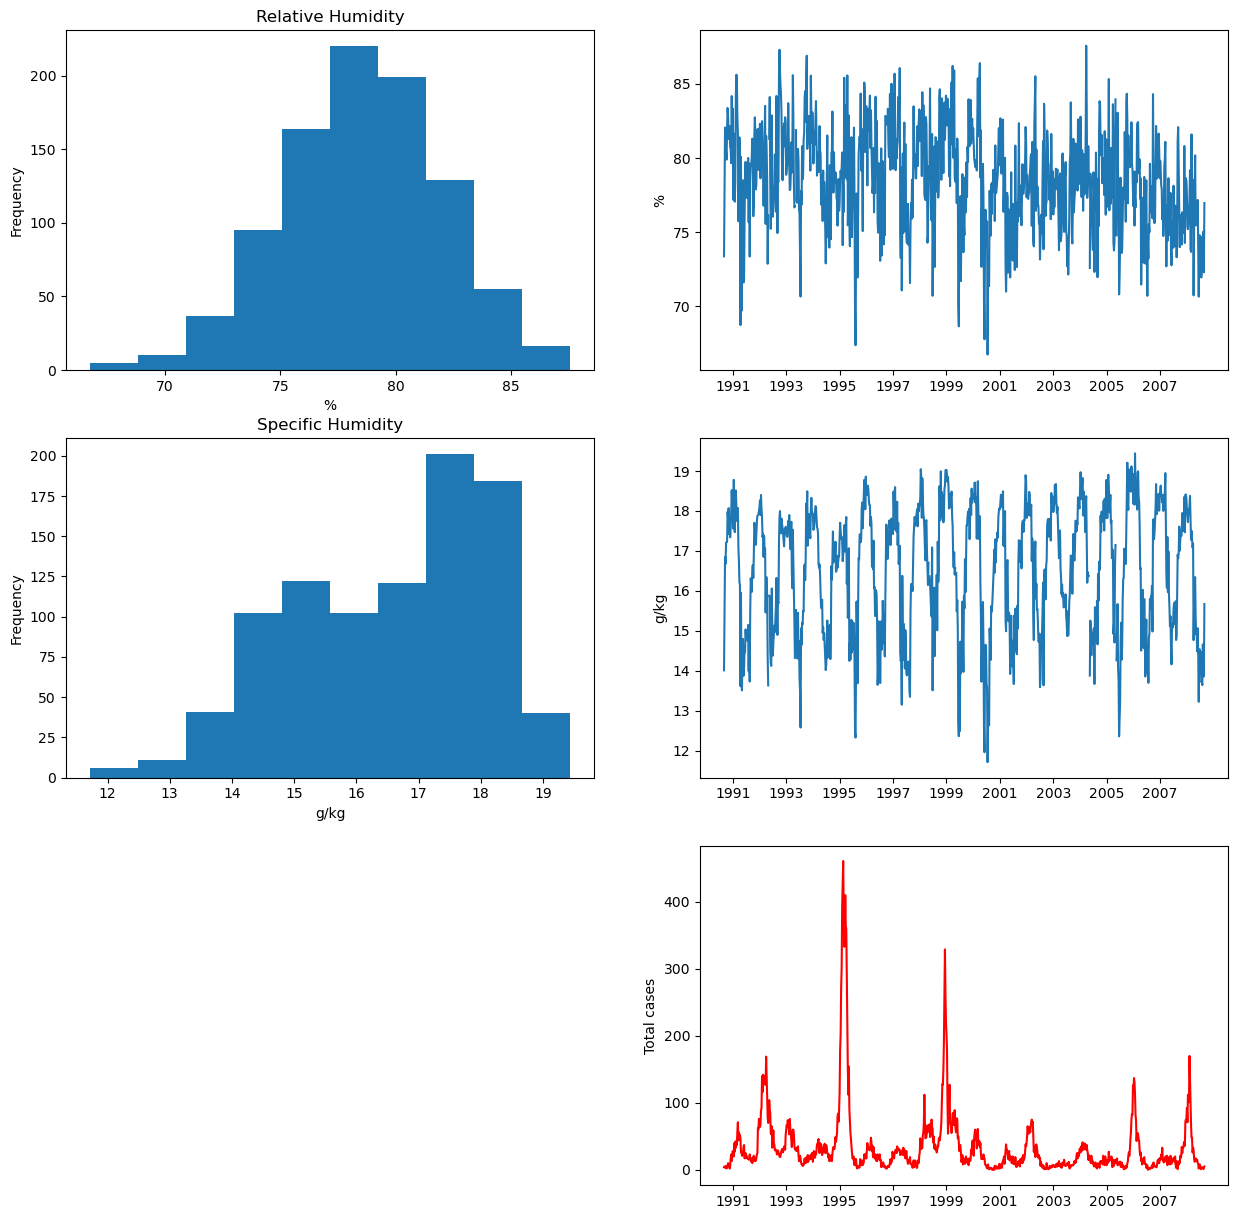

In [13]:
plt.figure(figsize=(15,15))

ax1 = plt.subplot(3, 2, 1)
ax1.hist(df.reanalysis_relative_humidity_percent)
ax1.set_title('Relative Humidity')
ax1.set_xlabel('%')
ax1.set_ylabel('Frequency')

ax2 = plt.subplot(3, 2, 2)
ax2.plot(df.reanalysis_relative_humidity_percent)
ax2.set_ylabel('%')
ax2.set_xticks(bar2,years2);

ax1 = plt.subplot(3, 2, 3)
ax1.hist(df.reanalysis_specific_humidity_g_per_kg)
ax1.set_title('Specific Humidity')
ax1.set_xlabel('g/kg')
ax1.set_ylabel('Frequency')

ax2 = plt.subplot(3, 2, 4)
ax2.plot(df.reanalysis_specific_humidity_g_per_kg)
ax2.set_ylabel('g/kg')
ax2.set_xticks(bar2,years2);

ax3 = plt.subplot(3, 2, 6)
ax3.plot(df.total_cases, 'r')
ax3.set_ylabel('Total cases')
ax3.set_xticks(bar2,years2);

plt.show()

## Average temperature

In [14]:
df[['station_avg_temp_c','reanalysis_avg_temp_k','reanalysis_air_temp_k']].describe()

,station_avg_temp_c,reanalysis_avg_temp_k,reanalysis_air_temp_k
count,930.000000,930.000000,930.000000
mean,27.006528,26.126920,26.013653
std,1.415473,1.218637,1.236429
min,22.842857,22.964286,22.788571
25%,25.842857,25.150000,25.045000
50%,27.228571,26.228571,26.104286
75%,28.185714,27.078571,26.982857
max,30.071429,29.014286,29.050000


In [15]:
df.drop(['reanalysis_avg_temp_k','reanalysis_air_temp_k'], axis=1, inplace=True)

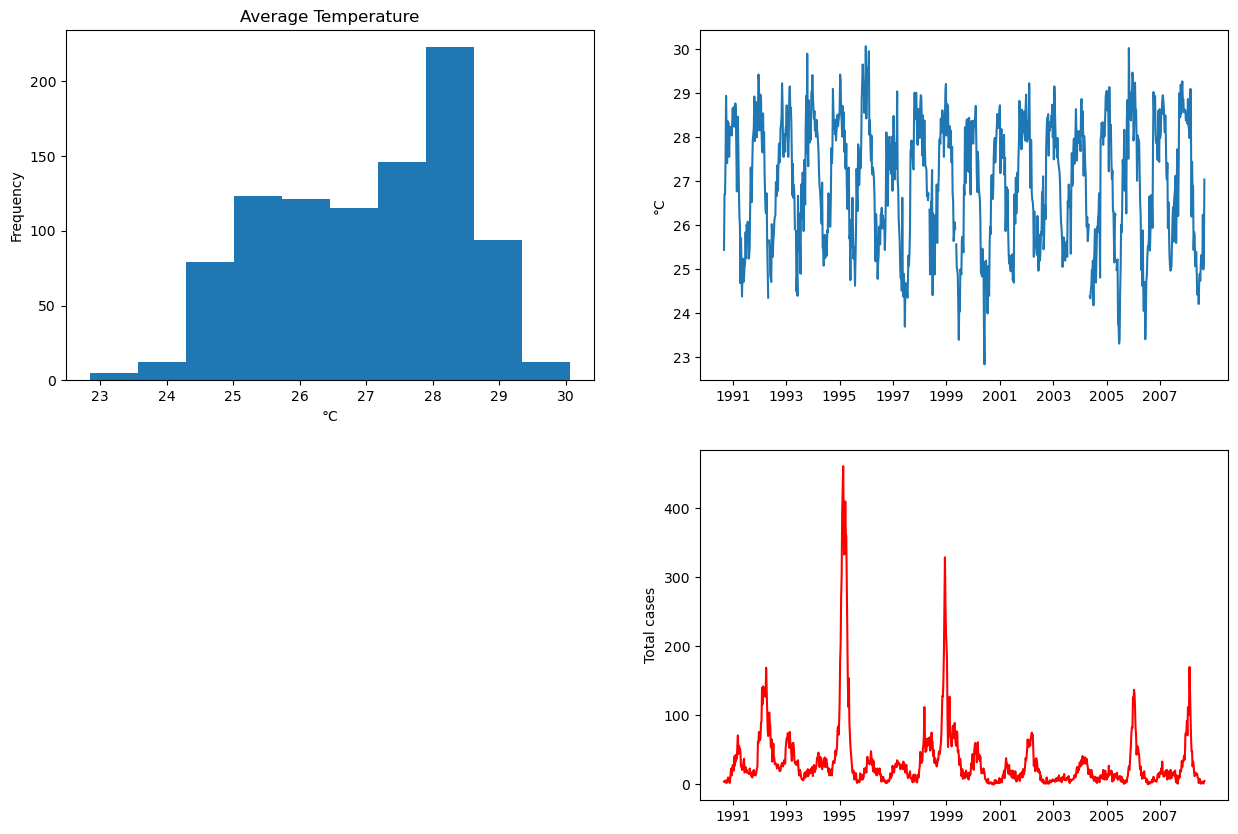

In [16]:
plt.figure(figsize=(15,10))

ax1 = plt.subplot(2, 2, 1)
ax1.hist(df.station_avg_temp_c)
ax1.set_title('Average Temperature')
ax1.set_xlabel('°C')
ax1.set_ylabel('Frequency')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(df.station_avg_temp_c)
ax2.set_ylabel('°C')
ax2.set_xticks(bar2,years2);

ax3 = plt.subplot(2, 2, 4)
ax3.plot(df.total_cases, 'r')
ax3.set_ylabel('Total cases')
ax3.set_xticks(bar2,years2);

plt.show()

## Maximum temperature

In [17]:
df[['station_max_temp_c','reanalysis_max_air_temp_k']].describe()

,station_max_temp_c,reanalysis_max_air_temp_k
count,930.000000,930.000000
mean,31.607957,28.248817
std,1.717297,1.258927
min,26.700000,24.650000
25%,30.600000,27.250000
50%,31.700000,28.350000
75%,32.800000,29.250000
max,35.600000,31.150000


In [18]:
df.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)

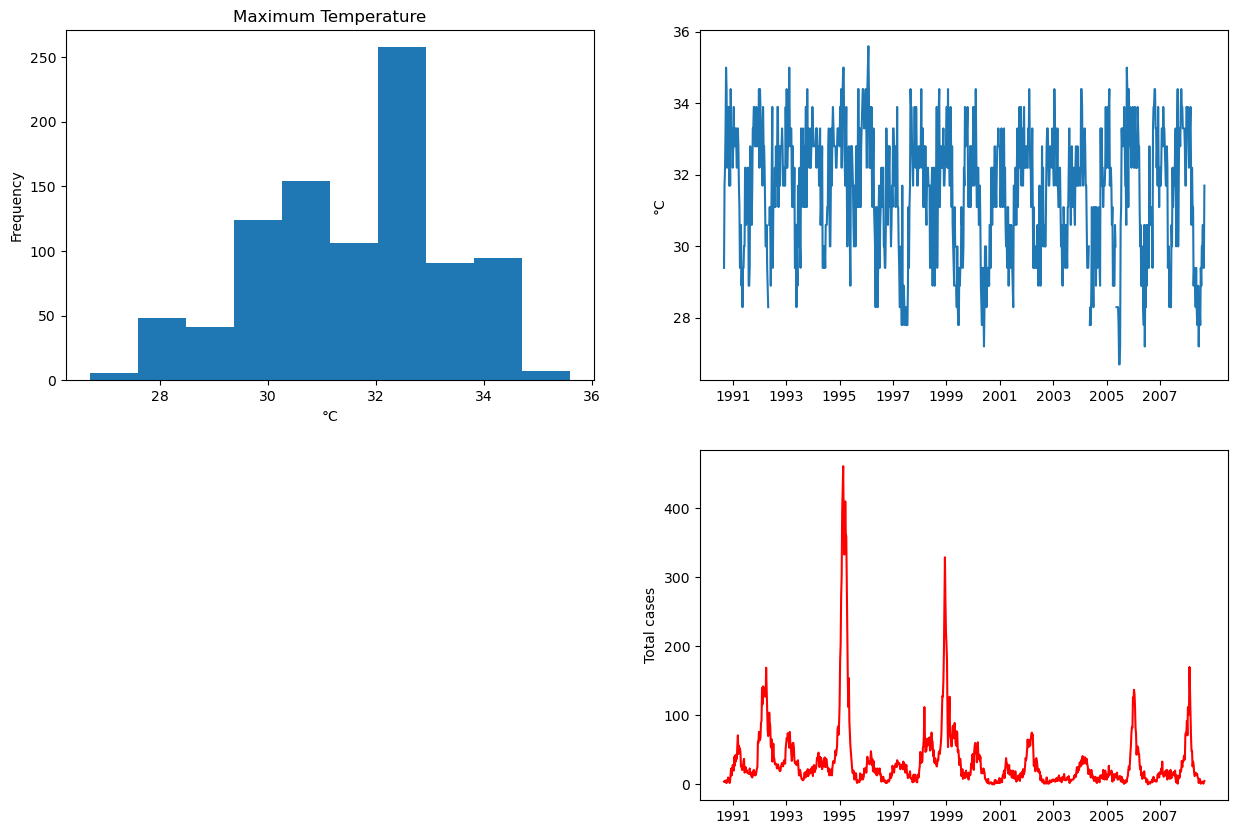

In [19]:
plt.figure(figsize=(15,10))

ax1 = plt.subplot(2, 2, 1)
ax1.hist(df.station_max_temp_c)
ax1.set_title('Maximum Temperature')
ax1.set_xlabel('°C')
ax1.set_ylabel('Frequency')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(df.station_max_temp_c)
ax2.set_ylabel('°C')
ax2.set_xticks(bar2,years2);

ax3 = plt.subplot(2, 2, 4)
ax3.plot(df.total_cases, 'r')
ax3.set_ylabel('Total cases')
ax3.set_xticks(bar2,years2);

plt.show()

## Minimum temperature

In [20]:
df[['station_min_temp_c','reanalysis_min_air_temp_k']].describe()

,station_min_temp_c,reanalysis_min_air_temp_k
count,930.000000,930.000000
mean,22.600645,24.151828
std,1.506277,1.294705
min,17.800000,19.450000
25%,21.700000,23.150000
50%,22.800000,24.350000
75%,23.900000,25.250000
max,25.600000,26.750000


In [21]:
df.drop('reanalysis_min_air_temp_k', axis=1, inplace=True)

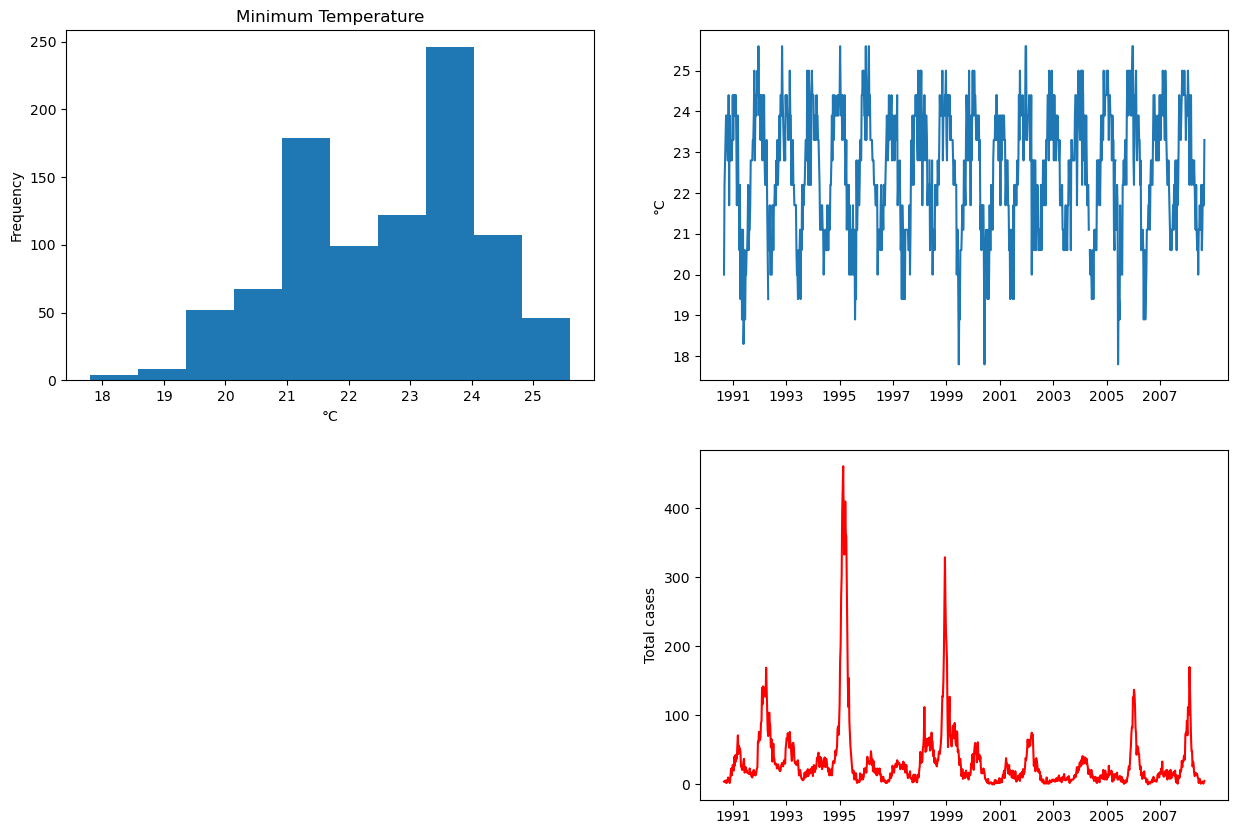

In [22]:
plt.figure(figsize=(15,10))

ax1 = plt.subplot(2, 2, 1)
ax1.hist(df.station_min_temp_c)
ax1.set_title('Minimum Temperature')
ax1.set_xlabel('°C')
ax1.set_ylabel('Frequency')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(df.station_min_temp_c)
ax2.set_ylabel('°C')
ax2.set_xticks(bar2,years2);

ax3 = plt.subplot(2, 2, 4)
ax3.plot(df.total_cases, 'r')
ax3.set_ylabel('Total cases')
ax3.set_xticks(bar2,years2);

plt.show()

## Diurnal temperature range

In [23]:
df[['station_diur_temp_rng_c','reanalysis_tdtr_k']].describe()

,station_diur_temp_rng_c,reanalysis_tdtr_k
count,930.000000,930.000000
mean,6.757373,2.516267
std,0.835993,0.498892
min,4.528571,1.357143
25%,6.200000,2.157143
50%,6.757143,2.457143
75%,7.285714,2.800000
max,9.914286,4.428571


In [24]:
df.drop('reanalysis_tdtr_k', axis=1, inplace=True)

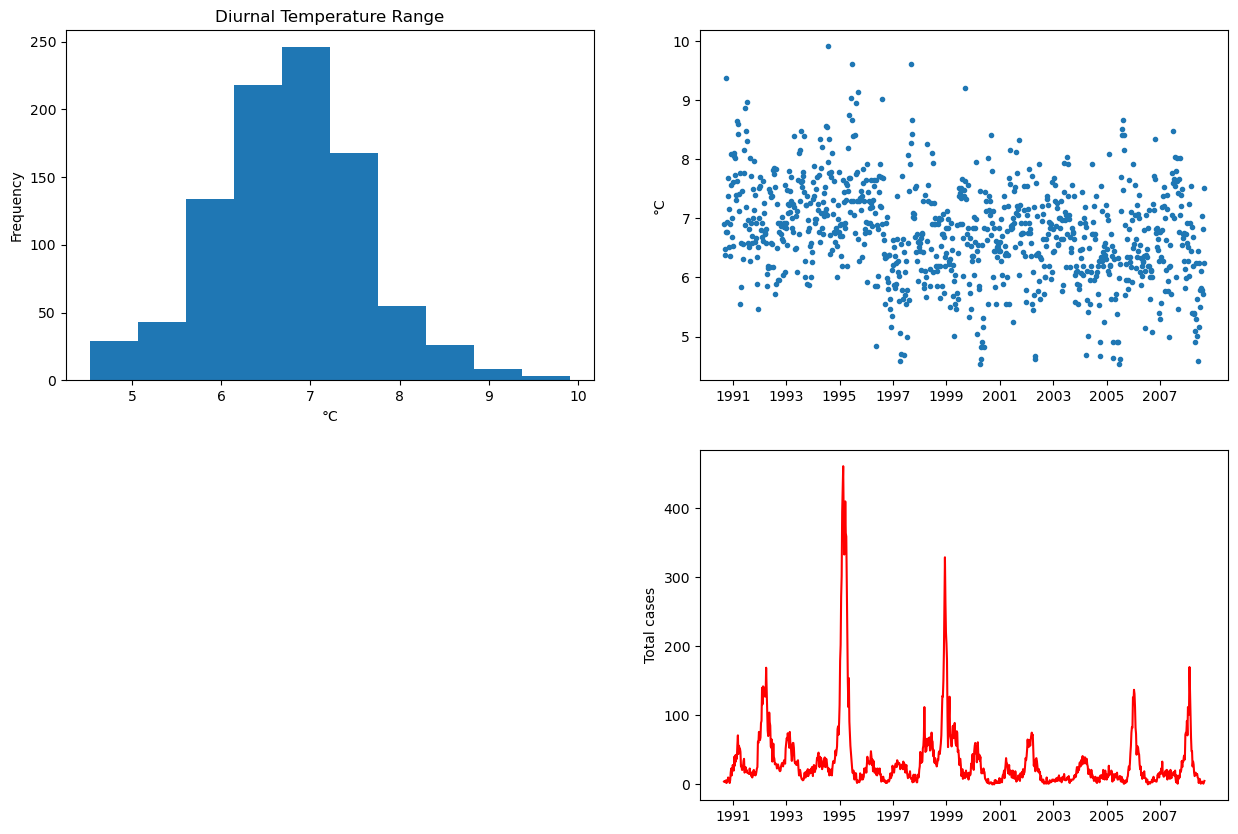

In [25]:
plt.figure(figsize=(15,10))

ax1 = plt.subplot(2, 2, 1)
ax1.hist(df.station_diur_temp_rng_c)
ax1.set_title('Diurnal Temperature Range')
ax1.set_xlabel('°C')
ax1.set_ylabel('Frequency')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(df.station_diur_temp_rng_c,'.')
ax2.set_ylabel('°C')
ax2.set_xticks(bar2,years2);

ax3 = plt.subplot(2, 2, 4)
ax3.plot(df.total_cases, 'r')
ax3.set_ylabel('Total cases')
ax3.set_xticks(bar2,years2);

plt.show()

## Looking at the df again

As we decided to only use the week of the year, delete the week start date. Dew point can also be extracted from other variables, so it makes no sense to let it here. 

In [26]:
df.drop(['week_start_date','reanalysis_dew_point_temp_k'], axis=1, inplace=True)
df

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,0.122600,0.103725,0.198483,0.177617,73.365714,14.012857,25.442857,6.900000,29.4,20.0,16.0,4
1,1990,19,0.169900,0.142175,0.162357,0.155486,77.368571,15.372857,26.714286,6.371429,31.7,22.2,8.6,5
2,1990,20,0.032250,0.172967,0.157200,0.170843,82.052857,16.848571,26.714286,6.485714,32.2,22.8,41.4,4
3,1990,21,0.128633,0.245067,0.227557,0.235886,80.337143,16.672857,27.471429,6.771429,33.3,23.3,4.0,3
4,1990,22,0.196200,0.262200,0.251200,0.247340,80.460000,17.210000,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,2008,13,0.077850,-0.039900,0.310471,0.296243,74.247143,13.644286,25.042857,5.785714,30.0,21.1,1.8,4
932,2008,14,-0.038000,-0.016833,0.119371,0.066386,74.600000,14.662857,26.242857,6.814286,30.6,22.2,0.5,3
933,2008,15,-0.155200,-0.052750,0.137757,0.141214,75.027143,14.184286,25.000000,5.714286,29.4,21.7,30.7,1
934,2008,16,0.001800,NaN,0.203900,0.209843,72.285714,13.858571,25.314286,6.242857,29.4,21.7,11.2,3


# NDVI

In [27]:
df[['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']].describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
count,745.000000,887.000000,917.000000,917.000000
mean,0.057925,0.067469,0.177655,0.165956
std,0.107153,0.092479,0.057166,0.056073
min,-0.406250,-0.456100,-0.015533,-0.063457
25%,0.004500,0.016425,0.139283,0.129157
50%,0.057700,0.068075,0.177186,0.165971
75%,0.111100,0.115200,0.212557,0.202771
max,0.493400,0.437100,0.393129,0.381420


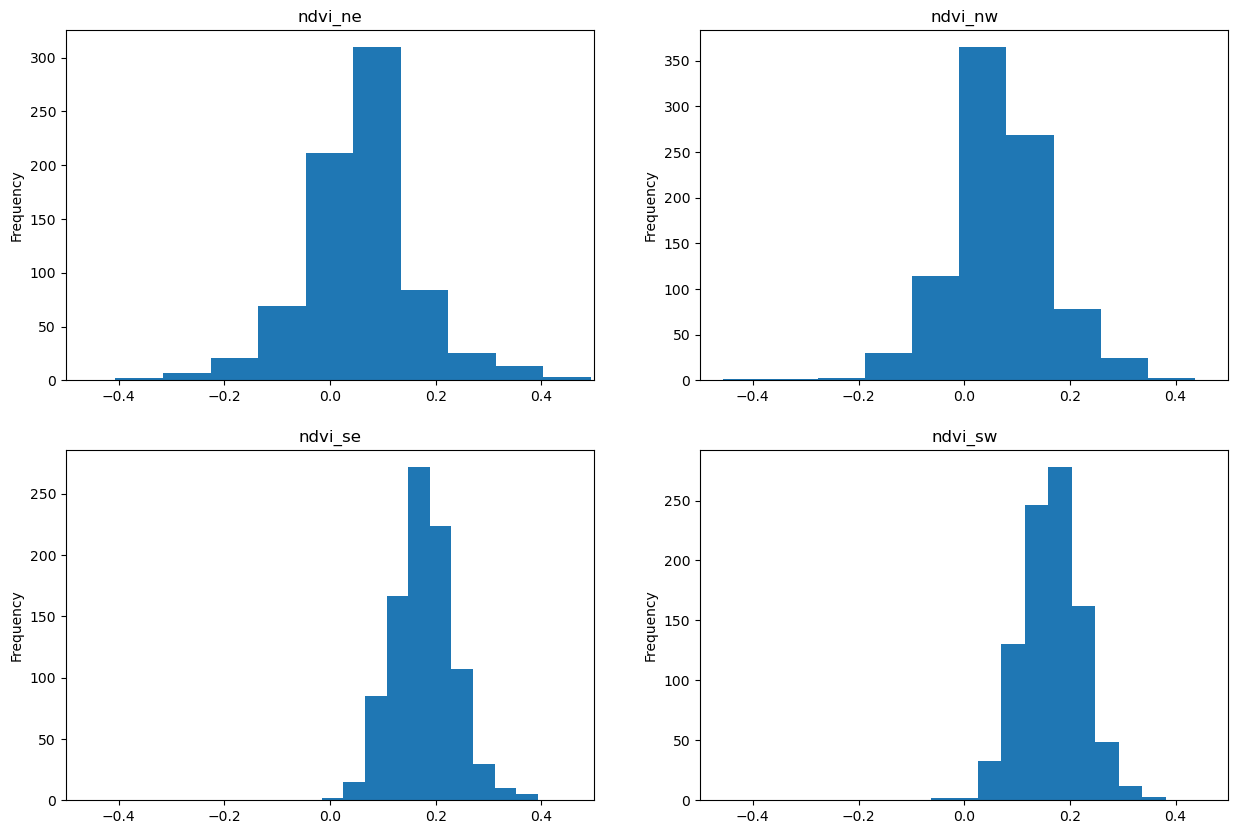

In [28]:
plt.figure(figsize=(15,10))

ax1 = plt.subplot(2, 2, 1)
ax1.hist(df.ndvi_ne)
ax1.set_title('ndvi_ne')
ax1.set_ylabel('Frequency')
ax1.set_xlim(-0.5,0.5)

ax2 = plt.subplot(2, 2, 2)
ax2.hist(df.ndvi_nw)
ax2.set_title('ndvi_nw')
ax2.set_ylabel('Frequency')
ax2.set_xlim(-0.5,0.5)

ax3 = plt.subplot(2, 2, 3)
ax3.hist(df.ndvi_se)
ax3.set_title('ndvi_se')
ax3.set_ylabel('Frequency')
ax3.set_xlim(-0.5,0.5)

ax4 = plt.subplot(2, 2, 4)
ax4.hist(df.ndvi_sw)
ax4.set_title('ndvi_sw')
ax4.set_ylabel('Frequency')
ax4.set_xlim(-0.5,0.5)

plt.show()

In general, NDVI values range from -1.0 to 1.0:
- <0: clouds and water, 
- ~0: bare soil, 
- 0.1 - 0.5: sparse vegetation,
- \> 0.6: dense green vegetation. 


Source: https://ipad.fas.usda.gov/cropexplorer/Definitions/spotveg.htm#:~:text=Normalized%20Difference%20Vegetation%20Index%20(NDVI)%3A&text=In%20general%2C%20NDVI%20values%20range,vegetation%20(0.6%20and%20above).

## Correlations

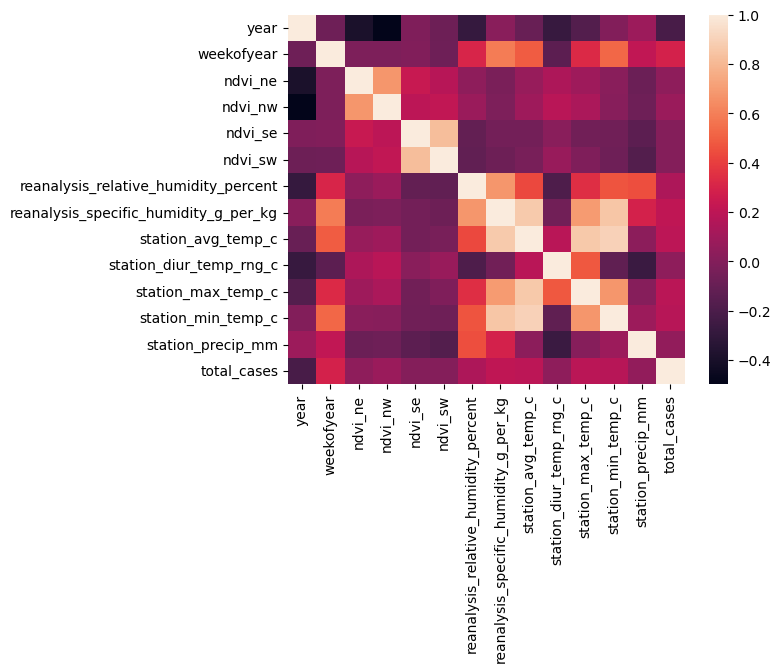

In [29]:
df_correlations = df.corr()
df_corr_heat = sns.heatmap(df_correlations)

<Axes: >

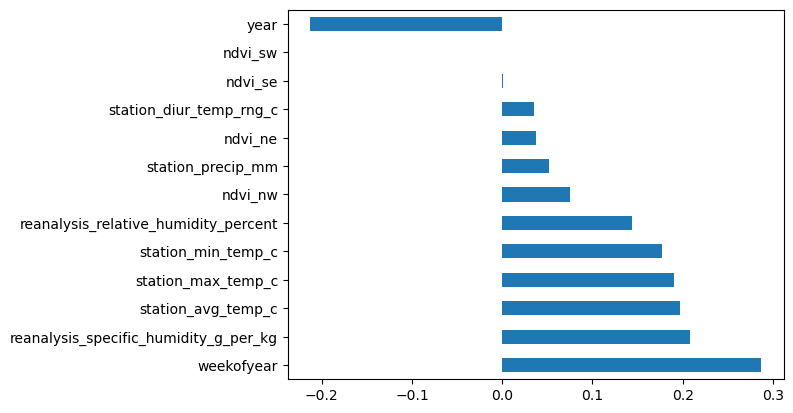

In [30]:
(df_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())